## Clustering_EastWestAirlines

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
Data Description:
 - The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

 - ID --Unique ID

 - Balance--Number of miles eligible for award travel

 - Qual_mile--Number of miles counted as qualifying for Topflight status

 - cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
 - cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
 - cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

 - 1 = under 5,000
 - 2 = 5,000 - 10,000
 - 3 = 10,001 - 25,000
 - 4 = 25,001 - 50,000
 - 5 = over 50,000

 - Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

 - Bonus_trans--Number of non-flight bonus transactions in the past 12 months

 - Flight_miles_12mo--Number of flight miles in the past 12 months

 - Flight_trans_12--Number of flight transactions in the past 12 months

 - Days_since_enrolled--Number of days since enrolled in flier program

 - Award--whether that person had award flight (free flight) or not


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [10]:
data=pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
#EDA
data2=data.drop(['ID#'],axis=1)
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [13]:
#Normalizing the data
data2_norm=pd.DataFrame(normalize(data2),columns=data2.columns)
data2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [14]:
#Now to apply KMeans clustering on norm data we must know optimu K value. It is found out by elbow curve.
#Based on centroid linkage KMeans algorithm aims to minimise within clster sum of squares (inertia)

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)          #model
    kmeans.fit(data2_norm)                #fitting model
    wcss.append(kmeans.inertia_)
    

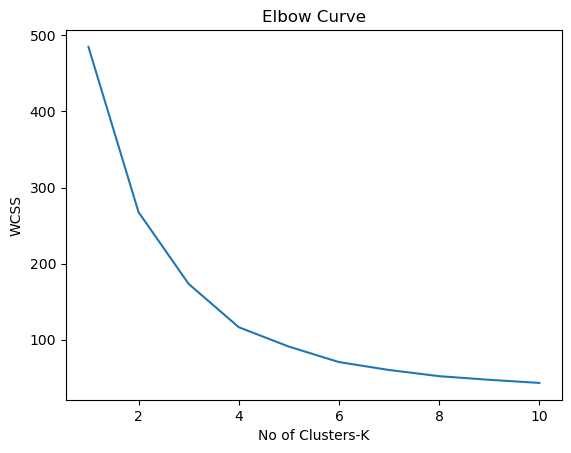

In [15]:
#Plot to select K value. WCSS vs K value
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("No of Clusters-K")
plt.ylabel("WCSS")
plt.show()

 -  No of clusters = 6

In [16]:
#Building Clster algorithm using K=6
cluster6=KMeans(n_clusters=6)
cluster6
y_kmeans=cluster6.fit_predict(data2_norm)
y_kmeans

array([0, 2, 0, ..., 5, 0, 2])

In [17]:
cluster6.labels_

array([0, 2, 0, ..., 5, 0, 2])

In [18]:
cluster6.cluster_centers_

array([[9.90175211e-01, 3.33996814e-03, 3.49642530e-05, 3.19018889e-05,
        3.18220633e-05, 6.98123408e-02, 1.36770790e-04, 6.55300300e-03,
        2.07999537e-05, 7.76809192e-02, 3.75440335e-06],
       [7.56495576e-01, 2.50629362e-03, 8.26061074e-05, 4.36871065e-05,
        4.25357709e-05, 6.20593504e-01, 4.68569947e-04, 1.46237437e-02,
        4.89810663e-05, 1.13432924e-01, 1.96527190e-05],
       [8.90891654e-01, 4.50057575e-03, 1.25282120e-04, 1.25179216e-04,
        1.25179216e-04, 7.60612276e-02, 3.03608458e-04, 5.81351107e-03,
        1.96567095e-05, 4.13792171e-01, 1.33768081e-05],
       [3.43122180e-01, 1.94657212e-03, 8.76831732e-05, 3.68901300e-05,
        3.64159868e-05, 9.04902707e-01, 5.03618738e-04, 1.47428379e-02,
        4.10358652e-05, 1.35179579e-01, 3.57262125e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-

In [19]:
#Add cluster label to data
#c6data=data2.copy()
# c6data
# c6data["c6id"]=cluster6.labels_
# c6data
md=pd.Series(y_kmeans)
data2["c6id"]=md
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c6id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,5
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [20]:
# Group data by cluster labels
data2.groupby('c6id').agg(['mean']).reset_index()

,c6id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,96807.420635,181.302646,1.448148,1.007937,1.002116,7635.707407,8.814815,522.720106,1.572487,3941.471958,0.257672
1,1,46897.281996,126.579176,3.303688,1.034707,1.043384,37790.279826,17.837310,544.494577,1.648590,4087.301518,0.711497
2,2,11531.350404,52.943396,1.002695,1.000000,1.000000,957.827493,3.463612,83.808625,0.269542,4921.630728,0.167116
3,3,18479.345238,81.630952,3.309524,1.017857,1.089286,45626.446429,17.720238,691.982143,1.958333,4421.857143,1.000000
4,4,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
5,5,82259.766533,142.227455,2.941884,1.024048,1.010020,28651.769539,16.947896,448.965932,1.315631,4051.519038,0.411824


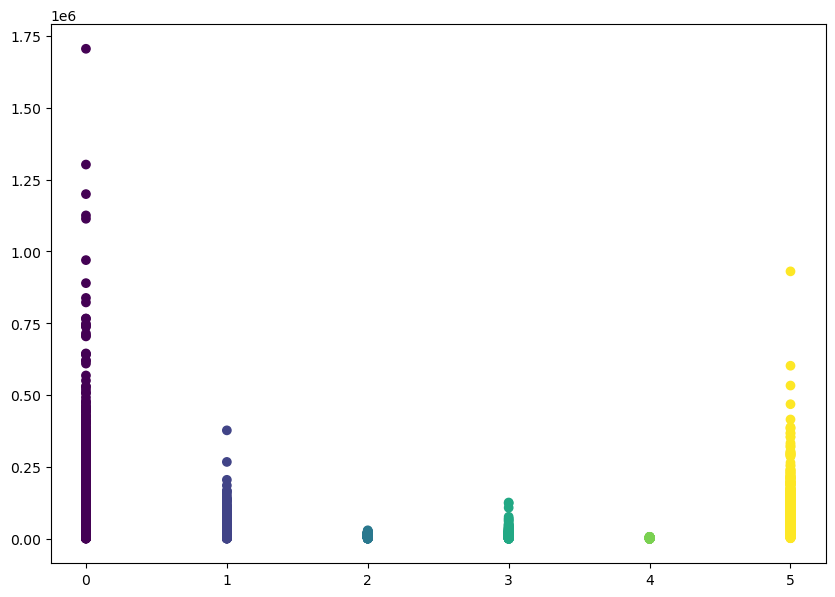

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data2['c6id'],data2['Balance'],c=cluster6.labels_)
plt.show()

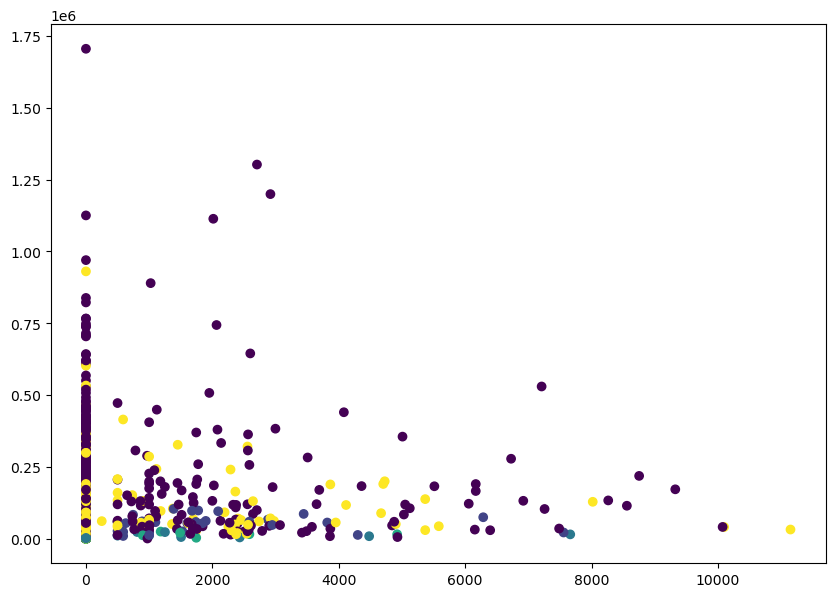

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(data2['Qual_miles'],data2['Balance'],c=cluster6.labels_)
plt.show()

In [23]:
#Building Clster algorithm using K=5
cluster5=KMeans(n_clusters=5)
cluster5
y_kmeans=cluster5.fit_predict(data2_norm)
y_kmeans

array([0, 4, 0, ..., 3, 0, 4])

In [24]:
#Add cluster label to data
c5data=data2.copy()
md=pd.Series(y_kmeans)
c5data["c5id"]=md
c5data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c6id,c5id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,5,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


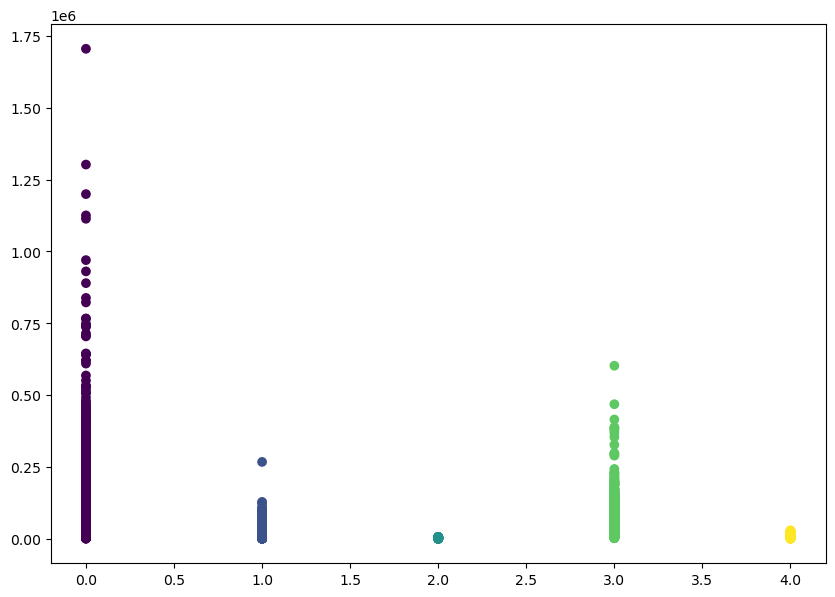

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(c5data['c5id'],c5data['Balance'],c=cluster5.labels_)
plt.show()

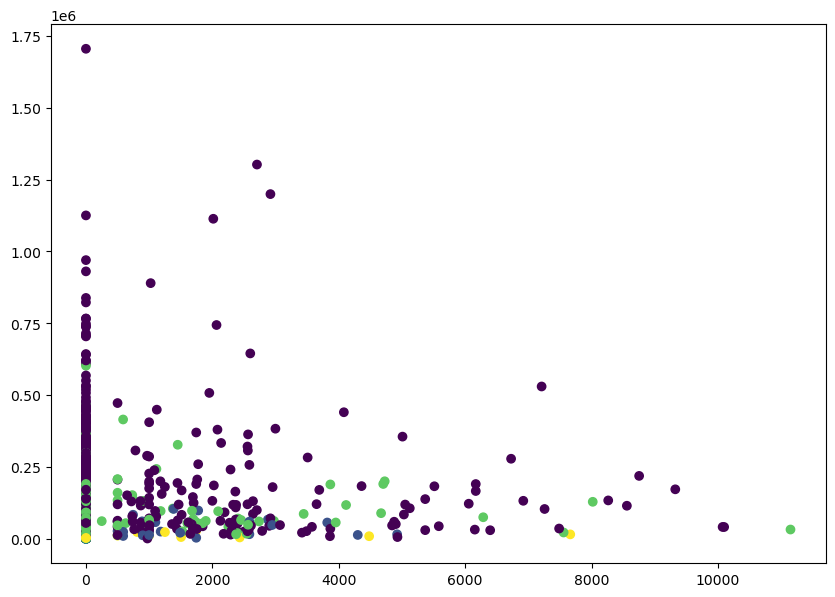

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(c5data['Qual_miles'],c5data['Balance'],c=cluster5.labels_)
plt.show()

In [27]:
#Building Clster algorithm using K=4
cluster4=KMeans(n_clusters=4)
cluster4
y_kmeans=cluster4.fit_predict(data2_norm)
y_kmeans

array([0, 0, 0, ..., 3, 0, 0])

In [28]:
#Add cluster label to data
c4data=data2.copy()
md=pd.Series(y_kmeans)
c4data["c4id"]=md
c4data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c6id,c4id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,5,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


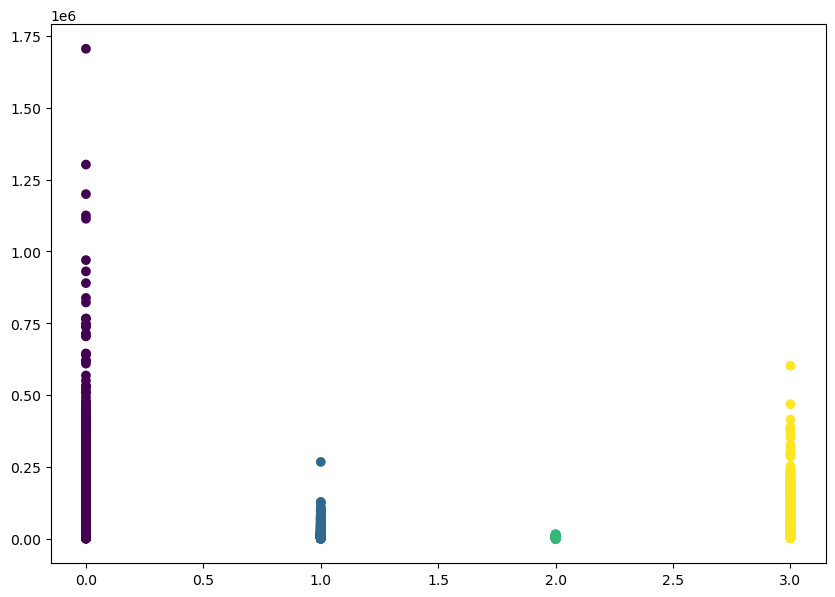

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(c4data['c4id'],c4data['Balance'],c=cluster4.labels_)
plt.show()

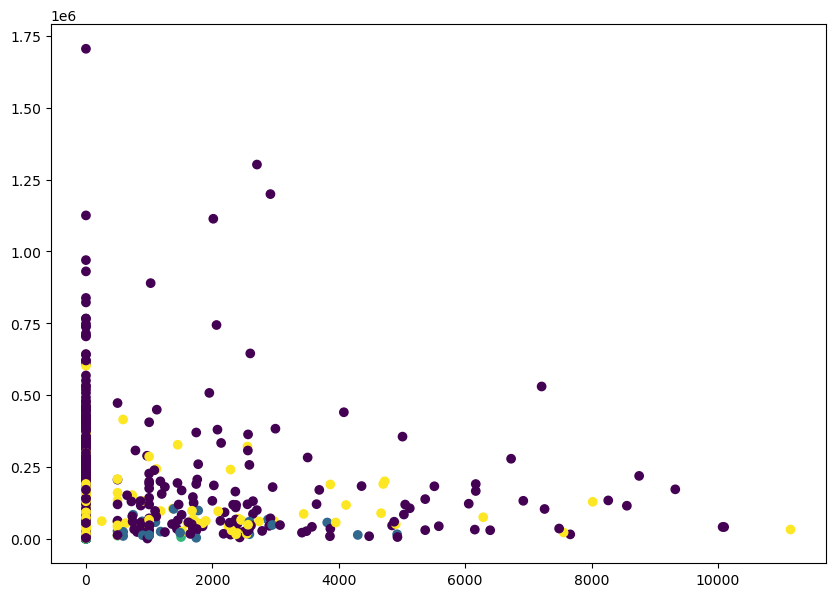

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(c4data['Qual_miles'],c4data['Balance'],c=cluster4.labels_)
plt.show()